In [1]:
# Set the working directory to the parent directory
import sys
sys.path.append('..')
sys.dont_write_bytecode = True

# Import relevant packages
from src.eda import data_info, tsne_scatter, VisualDistr
from src.preprocessing import fill_data, ScaleData
import pandas as pd
import warnings
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split

# Config
pd.set_option('display.max_columns', None) # Ensure all columns are displayed
warnings.filterwarnings("ignore")

data = pd.read_feather("../data/raw/unprocessed.feather")
var_info = pd.read_csv("../results/preprocessing/raw_data_description.csv")
vars = [var for var in var_info["var_name"] if var != "y"]
display(var_info)

,var_name,var_type,data_type,missing,mean,median,mode,std_dev,skewness,kurtosis,min,max,num_unique,unique_list
0,age,numerical,int64,0,40.024060,38.000,NaN,10.421250,0.784697,0.791312,17.000,98.000,NaN,NaN
1,job,categorical,object,330,NaN,NaN,admin.,NaN,NaN,NaN,NaN,NaN,11.0,['housemaid' 'services' 'admin.' 'blue-collar'...
2,marital,categorical,object,80,NaN,NaN,married,NaN,NaN,NaN,NaN,NaN,3.0,['married' 'single' 'divorced' 'nan']
3,education,categorical,object,1731,NaN,NaN,university.degree,NaN,NaN,NaN,NaN,NaN,7.0,['basic.4y' 'high.school' 'basic.6y' 'basic.9y...
4,default,binary,object,8597,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,2.0,['no' 'nan' 'yes']
5,housing,binary,object,990,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,2.0,['no' 'yes' 'nan']
6,loan,binary,object,990,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,2.0,['no' 'yes' 'nan']
7,contact,categorical,object,0,NaN,NaN,cellular,NaN,NaN,NaN,NaN,NaN,2.0,['telephone' 'cellular']
8,month,categorical,object,0,NaN,NaN,may,NaN,NaN,NaN,NaN,NaN,10.0,['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'ma...
9,day_of_week,categorical,object,0,NaN,NaN,thu,NaN,NaN,NaN,NaN,NaN,5.0,['mon' 'tue' 'wed' 'thu' 'fri']


## 1. Fill Data

In [2]:
filled_data = data.copy()

# Fill with mean
for var in ["emp_var_rate", "cons_price_idx", "cons_conf_idx", "euribor3m", "nr_employed"]:
    filled_data[var] = fill_data(var, data, var_info, fill_tp="mean")
# Fill with median
for var in ["age", "campaign"]:
    filled_data[var] = fill_data(var, data, var_info, fill_tp="median")
# Fill with mode
for var in ["marital", "contact", "month", "day_of_week", "poutcome"]:
    filled_data[var] = fill_data(var, data, var_info, fill_tp="mode")
# Fill with "unknown"
for var in ["job", "education", "default", "housing", "loan"]:
    filled_data[var] = fill_data(var, data, var_info, fill_val="unknown")
# Fill with specific values
filled_data["duration"] = fill_data("duration", data, var_info, fill_val=0)
filled_data["pdays"] = fill_data("pdays", data, var_info, fill_val=-1)
filled_data["previous"] = fill_data("previous", data, var_info, fill_val=0)

# Show new variable information
var_info = data_info(filled_data)
display(var_info)

,var_name,var_type,data_type,missing,mean,median,mode,std_dev,skewness,kurtosis,min,max,num_unique,unique_list
0,age,numerical,int64,0,40.024060,38.000,NaN,10.421250,0.784697,0.791312,17.000,98.000,NaN,NaN
1,job,categorical,object,0,NaN,NaN,admin.,NaN,NaN,NaN,NaN,NaN,12.0,"[housemaid, services, admin., blue-collar, tec..."
2,marital,categorical,object,0,NaN,NaN,married,NaN,NaN,NaN,NaN,NaN,3.0,"[married, single, divorced]"
3,education,categorical,object,0,NaN,NaN,university.degree,NaN,NaN,NaN,NaN,NaN,8.0,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
4,default,categorical,object,0,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,3.0,"[no, unknown, yes]"
5,housing,categorical,object,0,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,3.0,"[no, yes, unknown]"
6,loan,categorical,object,0,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,3.0,"[no, yes, unknown]"
7,contact,categorical,object,0,NaN,NaN,cellular,NaN,NaN,NaN,NaN,NaN,2.0,"[telephone, cellular]"
8,month,categorical,object,0,NaN,NaN,may,NaN,NaN,NaN,NaN,NaN,10.0,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
9,day_of_week,categorical,object,0,NaN,NaN,thu,NaN,NaN,NaN,NaN,NaN,5.0,"[mon, tue, wed, thu, fri]"


## 2. Pre-Scale Data

In [3]:
prescaled_data = filled_data.copy()

# Pre-scale with bucketing or log transform
prescaled_data["pdays"] = filled_data["pdays"].apply(lambda x: "never" if x < 0 
                                                     else "recent" if x <= 5 
                                                     else "intermediate" if x <= 30 
                                                     else "long_ago")
prescaled_data["duration"] = np.log10(filled_data["duration"] + 0.00001)
prescaled_data["campaign"] = np.log10(filled_data["campaign"] + 0.00001)
prescaled_data["previous"] = np.log10(filled_data["previous"] + 0.00001)

# Show new variable information
var_info = data_info(prescaled_data)
display(var_info)

,var_name,var_type,data_type,missing,mean,median,mode,std_dev,skewness,kurtosis,min,max,num_unique,unique_list
0,age,numerical,int64,0,40.024060,38.000000,NaN,10.421250,0.784697,0.791312,17.000000,98.000000,NaN,NaN
1,job,categorical,object,0,NaN,NaN,admin.,NaN,NaN,NaN,NaN,NaN,12.0,"[housemaid, services, admin., blue-collar, tec..."
2,marital,categorical,object,0,NaN,NaN,married,NaN,NaN,NaN,NaN,NaN,3.0,"[married, single, divorced]"
3,education,categorical,object,0,NaN,NaN,university.degree,NaN,NaN,NaN,NaN,NaN,8.0,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
4,default,categorical,object,0,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,3.0,"[no, unknown, yes]"
5,housing,categorical,object,0,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,3.0,"[no, yes, unknown]"
6,loan,categorical,object,0,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,3.0,"[no, yes, unknown]"
7,contact,categorical,object,0,NaN,NaN,cellular,NaN,NaN,NaN,NaN,NaN,2.0,"[telephone, cellular]"
8,month,categorical,object,0,NaN,NaN,may,NaN,NaN,NaN,NaN,NaN,10.0,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
9,day_of_week,categorical,object,0,NaN,NaN,thu,NaN,NaN,NaN,NaN,NaN,5.0,"[mon, tue, wed, thu, fri]"


## 3. Encode Data

In [4]:
encoded_data = prescaled_data.copy()

# Binary data
for var in var_info[var_info["var_type"]=="binary"]["var_name"]:
    encoded_data[var] = prescaled_data[var].apply(lambda x: 1 if x=="yes" else 0)
# Categorical data
encoded_data = pd.get_dummies(encoded_data, dtype=int, columns=var_info[var_info["var_type"]=="categorical"]["var_name"].tolist())

## 4. t-SNE Scatter Plot

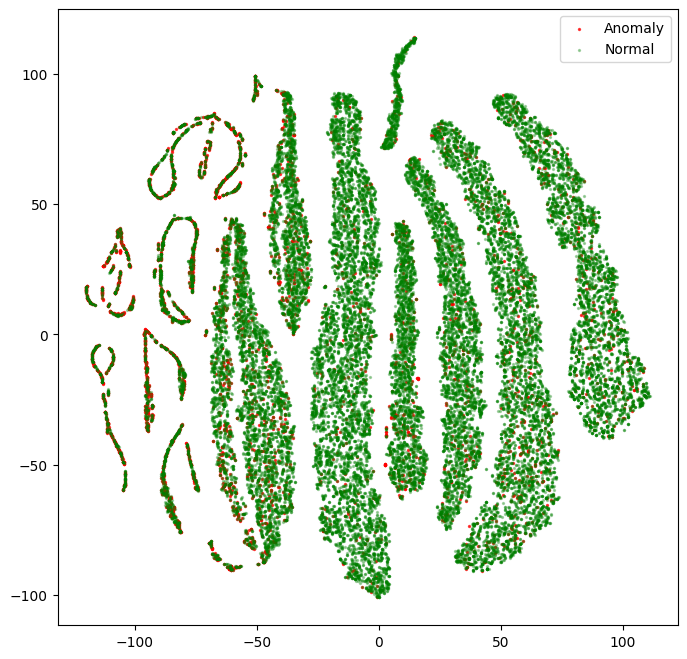

In [5]:
# Isolate features from labels 
features, labels = encoded_data.drop('y', axis=1).values, encoded_data.y.values

# Create the scatter plot
tsne = tsne_scatter(features, labels, dimensions=2)
tsne.savefig("../results/figures/raw_tsne.png")
tsne.show()

## 5. Split Data

In [6]:
# Generate normal dataset and shuffle
normal_data = encoded_data[encoded_data.y == 0].sample(frac=1).reset_index(drop=True)

# Generate anomaly dataset
anomaly_data = encoded_data[encoded_data.y == 1]

# Training set: exlusively normal observations (50%)
train_size = int(len(normal_data)*0.5)
X_train = normal_data.iloc[:train_size].drop('y', axis=1)

# Train-validate split
X_train, X_train_validate = train_test_split(X_train, test_size=0.3, random_state=42)

# Testing set: the remaining normal + all the anomaly 
X_test = pd.concat([normal_data.iloc[train_size:], anomaly_data]).sample(frac=1, random_state=42)
X_validate, X_test = train_test_split(X_test, test_size=0.5, random_state=42)
print("Proportions of y in validation set:")
print(X_validate.y.value_counts())
print("Proportions of y in test set:")
print(X_test.y.value_counts())

# Isolating the labels from the features
X_validate, y_validate = X_validate.drop('y', axis=1), X_validate[["y"]]
X_test, y_test = X_test.drop('y', axis=1), X_test[["y"]]

print(f"""Size of the datasets:
    Training: {X_train.shape}
    Training validation: {X_train_validate.shape}
    Validate: {X_validate.shape}
    Test: {X_test.shape}""")

Proportions of y in validation set:
y
0    9152
1    2305
Name: count, dtype: int64
Proportions of y in test set:
y
0    9122
1    2335
Name: count, dtype: int64
Size of the datasets:
    Training: (12791, 64)
    Training validation: (5483, 64)
    Validate: (11457, 64)
    Test: (11457, 64)


## 6. Scale Data

In [7]:
sd = ScaleData(var_info)
pipeline = sd.scale_fit(X_train)
X_train_scaled = sd.scale_transform(X_train, pipeline)
X_train_validate_scaled = sd.scale_transform(X_train_validate, pipeline)
X_validate_scaled = sd.scale_transform(X_validate, pipeline)
X_test_scaled = sd.scale_transform(X_test, pipeline)

## 7. Visualize Preprocessed Data

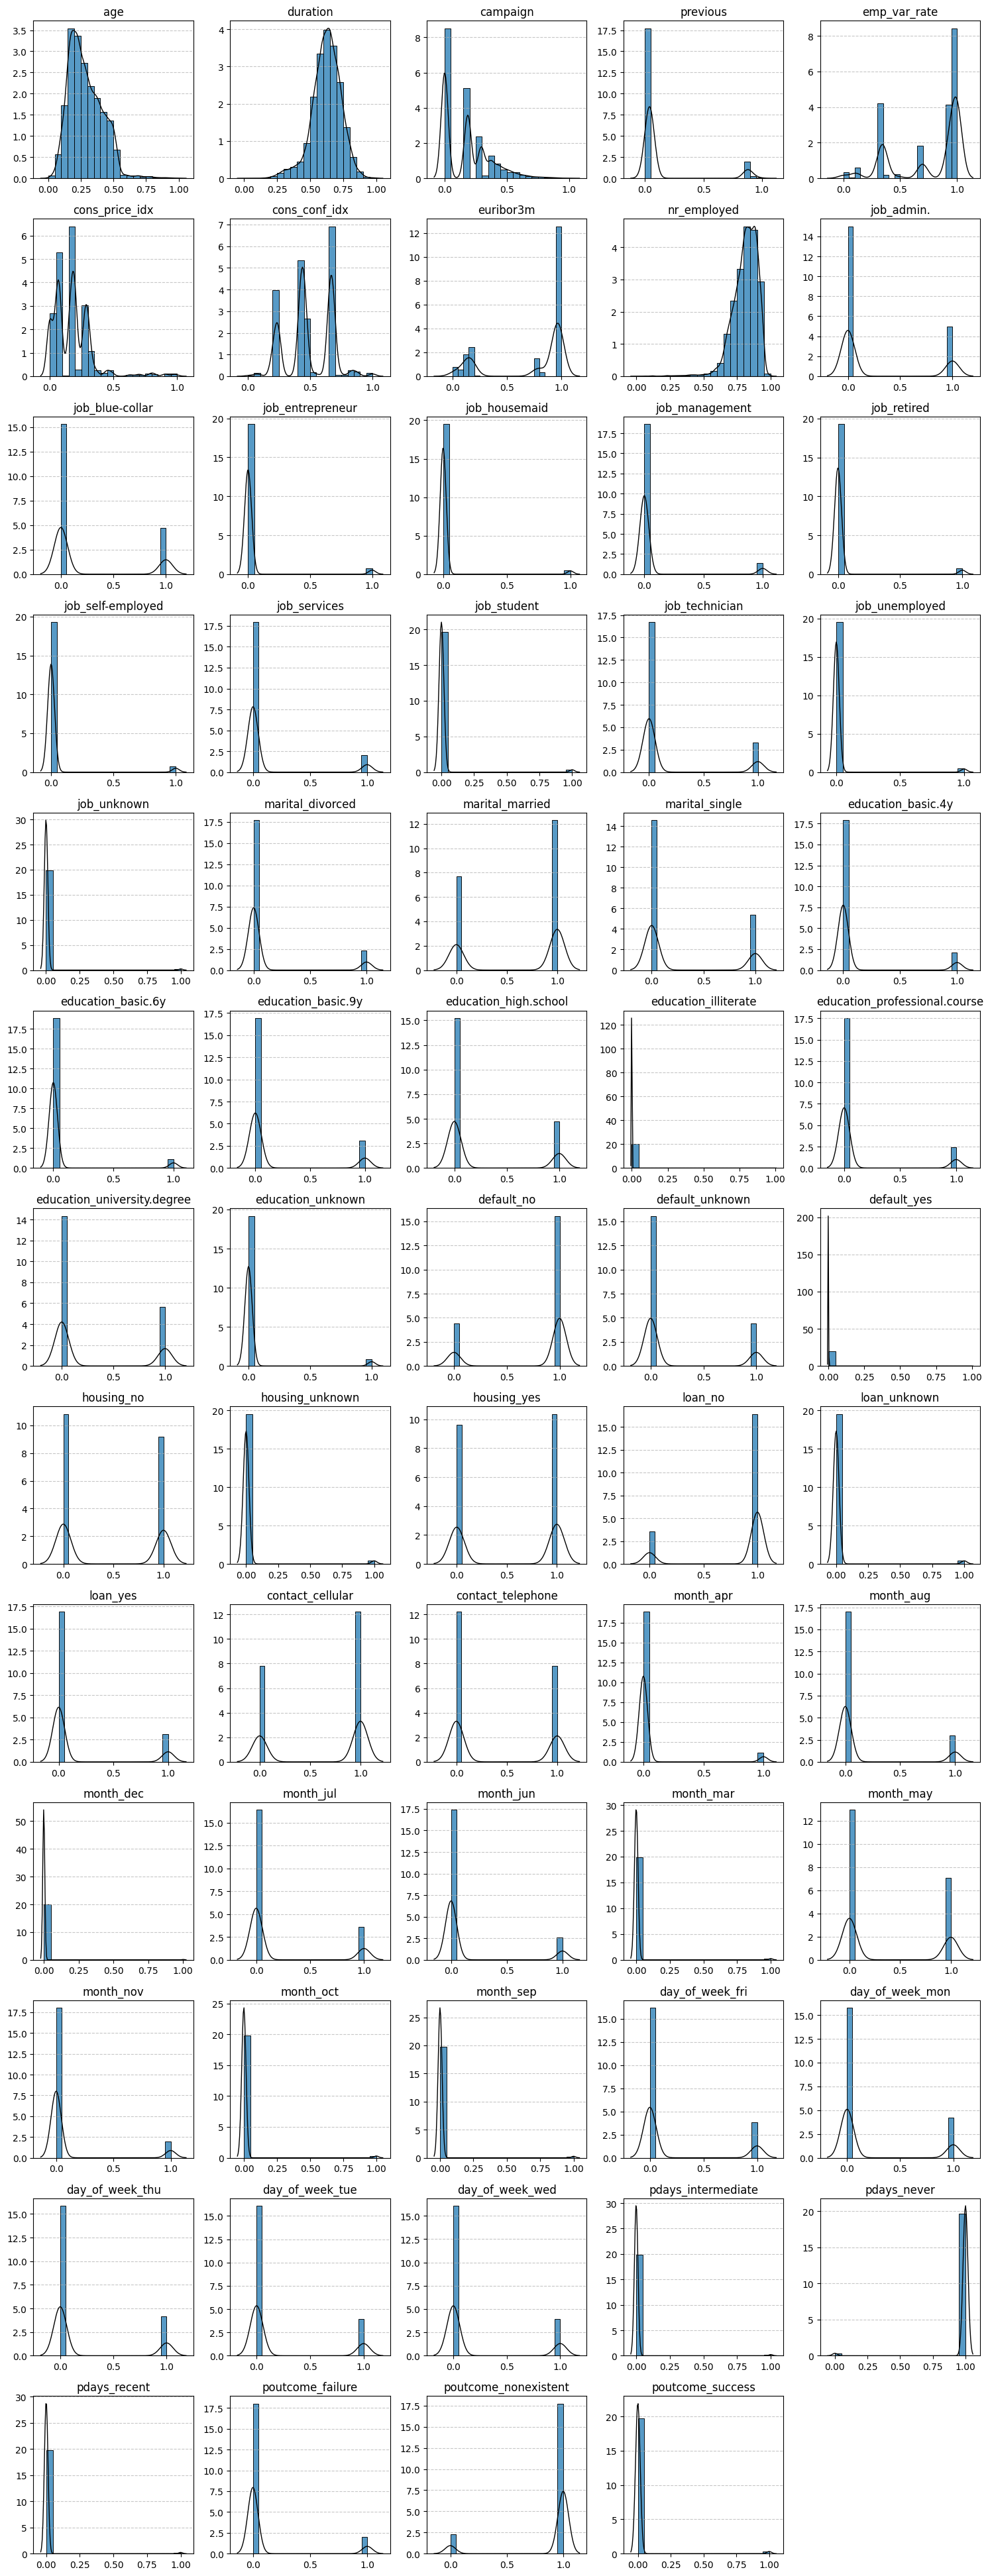

In [8]:
# Show new variable information
var_info = data_info(encoded_data)

# Isolate numerical variables
num_vars = var_info[(var_info['var_type']=='numerical')&(var_info['var_name']!='y')]['var_name']
vd = VisualDistr(X_train_scaled, numerical_variables=num_vars)

# Plot the distributions of numerical variables
plt_num_distr = vd.plot_numerical_distributions(bins=20)
plt_num_distr.savefig("../results/figures/train_num_distr.png")
plt_num_distr.show()

## 8. Save data

In [9]:
X_train_scaled.to_feather("../data/processed/X_train.feather")
X_train_validate_scaled.to_feather("../data/processed/X_train_validate.feather")
X_validate_scaled.to_feather("../data/processed/X_validate.feather")
X_test_scaled.to_feather("../data/processed/X_test.feather")

y_validate.to_feather("../data/processed/y_validate.feather")
y_test.to_feather("../data/processed/y_test.feather")